In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
# Average R, ubRMSD, RMSD, Bias with error bars: Network (2 bars) * Dataset (13) for No_Timefilter

# Horizontal bar chart
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html

# Grouped bar charts
# https://benalexkeen.com/bar-charts-in-matplotlib/

In [9]:
print(os.getcwd())

C:\git\soil-moisture-sweden\metrics


# Station level metrics

In [19]:
f = r"station_evaluation\station_metrics.csv"
mdf = pd.read_csv(f)
print(mdf)

      network station station_code        lon        lat        cover  \
0        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
1        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
2        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
3        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
4        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
...       ...     ...          ...        ...        ...          ...   
79385    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79386    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79387    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79388    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79389    HOBE    3.09         H309   9.294500  55.860900  Agriculture   

      eval_dataset     timefilter   anomaly  pearson_r  pearson_r_p-value  \
0         ERA5 0-1  No-Timefilter  absolute   

In [23]:
df = mdf[(mdf['timefilter'] == 'No-Timefilter') & (mdf['network'] == 'ICOS')]
df = df[['station', 'eval_dataset', 'pearson_r', 'bias', 'ubrmsd']]
print(df)

           station        cover eval_dataset  pearson_r      bias    ubrmsd
0           Degero      Wetland     ERA5 0-1   0.087554  0.202351  0.135560
85      Hyltemossa       Forest     ERA5 0-1   0.535303  0.038260  0.064268
170          Lanna  Agriculture     ERA5 0-1   0.243446 -0.255152  0.106847
255        Norunda       Forest     ERA5 0-1   0.439512 -0.200622  0.053528
340      Stordalen      Wetland     ERA5 0-1   0.432787 -0.042755  0.105258
...            ...          ...          ...        ...       ...       ...
76415   Hyltemossa       Forest        GLDAS   0.210222       NaN       NaN
76500        Lanna  Agriculture        GLDAS   0.127214       NaN       NaN
76585      Norunda       Forest        GLDAS   0.229766       NaN       NaN
76670    Stordalen      Wetland        GLDAS   0.066567       NaN       NaN
76755  Svartberget       Forest        GLDAS   0.205276       NaN       NaN

[154 rows x 6 columns]


In [24]:
table = pd.pivot_table(df,index=['eval_dataset'],columns=['station'],values=['pearson_r'])
table

pearson_r                                           \
station             Degero Hyltemossa     Lanna   Norunda Stordalen   
eval_dataset                                                          
ASCAT 12.5 TS    -0.003881   0.291837  0.257690  0.232970 -0.061359   
CCI Active        0.010414   0.316557  0.333287  0.205125 -0.104187   
CCI Combined      0.024564   0.306425  0.317291  0.225988 -0.085429   
CCI Passive       0.075370   0.283559  0.127263  0.101446       NaN   
ERA5 0-1          0.066904   0.456133  0.253834  0.348542  0.244407   
ERA5 0-25         0.065261   0.452538  0.254907  0.349055  0.246587   
GLDAS            -0.068074   0.344265  0.112805  0.286350  0.059635   
SMAP L3           0.017347   0.326061  0.125563  0.201672  0.061995   
SMAP L3 Enhanced  0.038476   0.268024  0.276960  0.201695 -0.064180   
SMAP L4           0.092238   0.395490  0.182435  0.386780  0.149397   
SMOS-BEC          0.090430   0.036078  0.116916  0.022967  0.078451   
SMOS-IC           0.127290   0.147471  0.158577  0.095247  0.180379   
Sentinel-1        0.179927   0.125856  0.267958 -0.044016  0.166025   

                              
station          Svartberget  
eval_dataset                  
ASCAT 12.5 TS       0.278202  
CCI Active          0.302071  
CCI Combined        0.289085  
CCI Passive         0.057539  
ERA5 0-1            0.390053  
ERA5 0-25           0.396469  
GLDAS              -0.008088  
SMAP L3             0.241214  
SMAP L3 Enhanced    0.249321  
SMAP L4             0.251256  
SMOS-BEC            0.252758  
SMOS-IC             0.231011  
Sentinel-1          0.121734

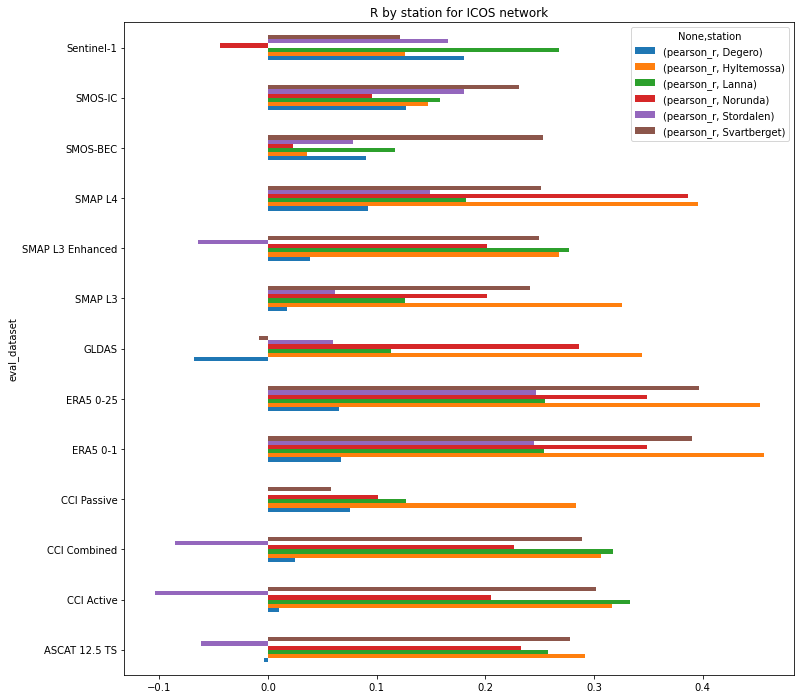

In [22]:
table.plot(kind="barh", figsize=(12,12), title="R by station for ICOS network")

In [25]:
df = mdf[(mdf['timefilter'] == 'No-Timefilter') & (mdf['network'] == 'HOBE')]
df = df[['station', 'cover', 'eval_dataset', 'pearson_r', 'bias', 'ubrmsd']]
print(df)

      station        cover eval_dataset  pearson_r      bias    ubrmsd
510      1.01        Heath     ERA5 0-1   0.811154  0.037394  0.038268
595      1.02  Agriculture     ERA5 0-1   0.838250 -0.072260  0.024409
680      1.03        Heath     ERA5 0-1   0.691257 -0.047047  0.049980
765      1.04       Forest     ERA5 0-1   0.536020 -0.060371  0.031512
850      1.05       Forest     ERA5 0-1   0.739781 -0.072545  0.034309
...       ...          ...          ...        ...       ...       ...
78965    3.05  Agriculture        GLDAS   0.474381       NaN       NaN
79050    3.06       Forest        GLDAS   0.184805       NaN       NaN
79135    3.07  Agriculture        GLDAS   0.172777       NaN       NaN
79220    3.08  Agriculture        GLDAS   0.434150       NaN       NaN
79305    3.09  Agriculture        GLDAS   0.433805       NaN       NaN

[780 rows x 6 columns]


In [32]:
# table = pd.pivot_table(df,index=['eval_dataset'],columns=['cover'],values=['pearson_r'], aggfunc=[np.mean, np.std])
table = pd.pivot_table(df,index=['eval_dataset'],columns=['cover'],values=['pearson_r'], aggfunc=np.mean)
table

pearson_r                    
cover            Agriculture    Forest     Heath
eval_dataset                                    
ASCAT 12.5 TS       0.551921  0.338251  0.346255
CCI Active          0.570531  0.349138  0.443123
CCI Combined        0.599284  0.373022  0.471745
CCI Passive         0.522135  0.354422  0.337789
ERA5 0-1            0.604813  0.495485  0.489484
ERA5 0-25           0.604356  0.494624  0.488975
GLDAS               0.501064  0.434943  0.397249
SMAP L3             0.705426  0.504163  0.413199
SMAP L3 Enhanced    0.698426  0.501239  0.409352
SMAP L4             0.561671  0.530648  0.453963
SMOS-BEC            0.466330  0.342247  0.256327
SMOS-IC             0.420728  0.296582  0.241546
Sentinel-1          0.392085  0.154392  0.239641

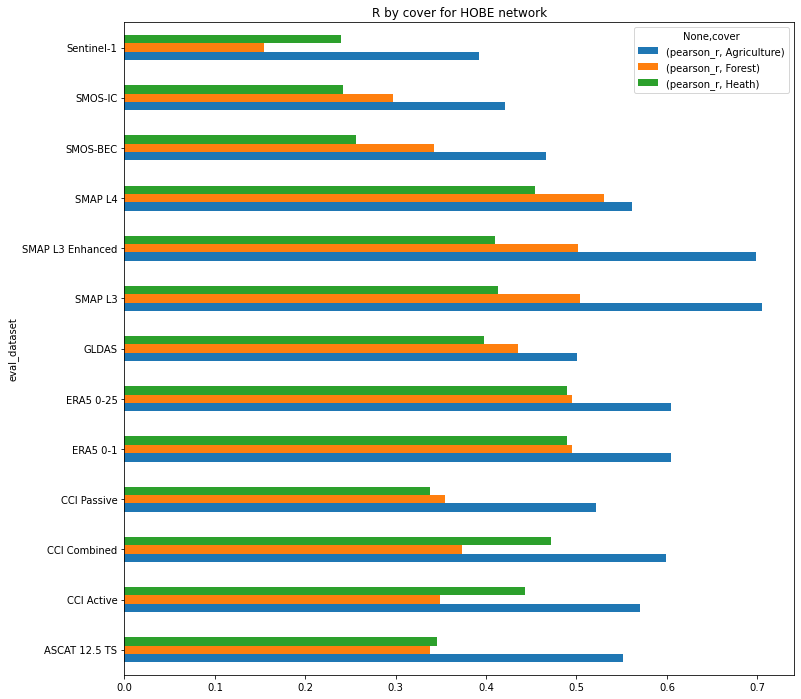

In [33]:
table.plot(kind="barh", figsize=(12,12), title="R by cover for HOBE network")

# Network level metrics

In [16]:
f = r"station_evaluation\network_metrics.csv"
mdf = pd.read_csv(f)
print(mdf)

     network eval_dataset     timefilter   anomaly  pearson_r  \
0       HOBE     ERA5 0-1  No-Timefilter  absolute  -0.172732   
1       HOBE     ERA5 0-1          Y2015  absolute  -0.259584   
2       HOBE     ERA5 0-1          Y2016  absolute  -0.265268   
3       HOBE     ERA5 0-1          Y2017  absolute  -0.074249   
4       HOBE     ERA5 0-1          Y2018  absolute  -0.140571   
...      ...          ...            ...       ...        ...   
4415    HOBE        GLDAS      Y2018-M11   anomaly   0.674817   
4416    HOBE        GLDAS      Y2015-M12   anomaly   0.238421   
4417    HOBE        GLDAS      Y2016-M12   anomaly  -0.055234   
4418    HOBE        GLDAS      Y2017-M12   anomaly  -0.088970   
4419    HOBE        GLDAS      Y2018-M12   anomaly   0.473271   

      pearson_r_p-value      bias      rmsd    ubrmsd      n pearson_sig  
0          0.000000e+00 -0.049883  0.183560  0.176653  94326        True  
1         4.381625e-302 -0.001333  0.202996  0.202991  19786        T

In [17]:
df = mdf[mdf['timefilter'] == 'No-Timefilter']
df = df[['network', 'eval_dataset', 'pearson_r', 'bias', 'ubrmsd']]
print(df)

     network      eval_dataset  pearson_r       bias     ubrmsd
0       HOBE          ERA5 0-1  -0.172732  -0.049883   0.176653
85      HOBE          ERA5 0-1   0.346504  -0.024101   0.106774
170     HOBE          ERA5 0-1   0.205313        NaN        NaN
255     HOBE          ERA5 0-1   0.392874        NaN        NaN
340     HOBE         ERA5 0-25  -0.047451  -0.028183   0.169757
425     HOBE         ERA5 0-25   0.345247  -0.024733   0.106831
510     HOBE         ERA5 0-25   0.206058        NaN        NaN
595     HOBE         ERA5 0-25   0.391491        NaN        NaN
680     HOBE           SMAP L4   0.301297  -0.042560   0.134158
765     HOBE           SMAP L4   0.350789  -0.010856   0.105918
850     HOBE           SMAP L4   0.188325        NaN        NaN
935     HOBE           SMAP L4   0.353172        NaN        NaN
1020    HOBE     ASCAT 12.5 TS   0.281552 -63.433436  17.846719
1105    HOBE     ASCAT 12.5 TS   0.286711 -59.397092  17.919587
1190    HOBE     ASCAT 12.5 TS   0.18927

In [13]:
f = r"station_evaluation\station_metrics.csv"
mdf = pd.read_csv(f)
print(mdf)

      network station station_code        lon        lat        cover  \
0        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
1        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
2        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
3        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
4        ICOS  Degero       SE-Deg  19.556539  64.182029      Wetland   
...       ...     ...          ...        ...        ...          ...   
79385    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79386    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79387    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79388    HOBE    3.09         H309   9.294500  55.860900  Agriculture   
79389    HOBE    3.09         H309   9.294500  55.860900  Agriculture   

      eval_dataset     timefilter   anomaly  pearson_r  pearson_r_p-value  \
0         ERA5 0-1  No-Timefilter  absolute   

In [18]:
# https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
table = pd.pivot_table(df,index=['eval_dataset'],columns=['network'],values=['pearson_r'])
table

,pearson_r
network,HOBE
eval_dataset,
ASCAT 12.5 TS,0.266407
CCI Active,0.299107
CCI Combined,0.235843
CCI Passive,0.201548
ERA5 0-1,0.192990
ERA5 0-25,0.223836
GLDAS,0.191427
SMAP L3,0.218331


In [38]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html#pandas.DataFrame.plot.barh
# ax = df.plot.barh(x='eval_dataset', y='pearson_r')

In [39]:
# https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
table = pd.pivot_table(df,index=['eval_dataset'],columns=['network'],values=['pearson_r'],aggfunc=np.mean)
table

pearson_r          
network               HOBE      ICOS
eval_dataset                        
ASCAT 12.5 TS     0.546597  0.164193
CCI Active        0.564562  0.177983
CCI Combined      0.594350  0.185028
CCI Passive       0.533018  0.165871
ERA5 0-1          0.624921  0.335566
ERA5 0-25         0.623978  0.335377
GLDAS             0.587134  0.100474
SMAP L3           0.674967  0.173605
SMAP L3 Enhanced  0.665267  0.180176
SMAP L4           0.608002  0.270556
SMOS-BEC          0.502110  0.126623
Sentinel-1        0.324156  0.164117

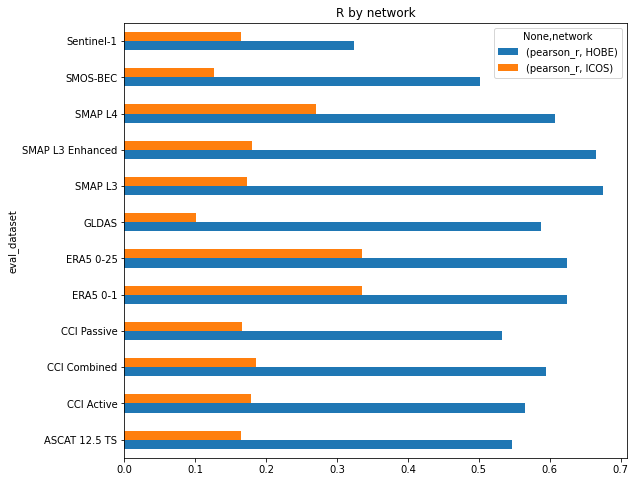

In [40]:
table.plot(kind="barh", figsize=(9,8), title="R by network")

In [41]:
# https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
table = pd.pivot_table(df,index=['eval_dataset'],columns=['network'],values=['bias'],aggfunc=np.mean)
table

bias           
network                HOBE       ICOS
eval_dataset                          
ASCAT 12.5 TS    -59.231736 -63.701979
CCI Active       -55.135023 -61.296318
CCI Combined      -0.026037   0.008502
CCI Passive       -0.191397  -0.290400
ERA5 0-1          -0.032426  -0.055059
ERA5 0-25         -0.033037  -0.032356
GLDAS            -21.439213 -28.920223
SMAP L3           -0.019285  -0.077609
SMAP L3 Enhanced  -0.023283  -0.059406
SMAP L4           -0.018097  -0.044890
SMOS-BEC           0.012022   0.025154
Sentinel-1       -55.298064 -52.660142

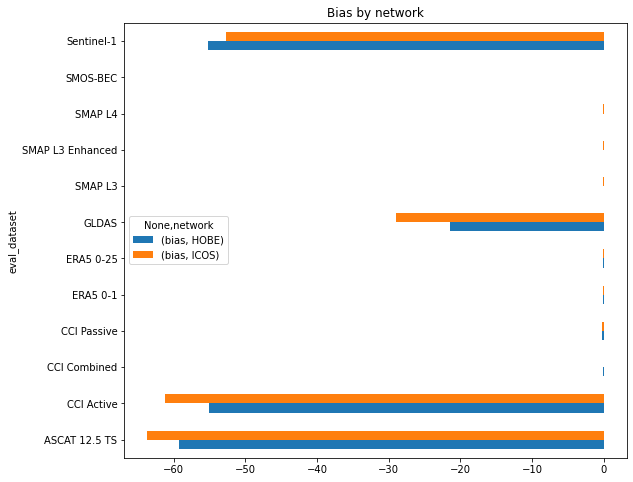

In [42]:
table.plot(kind="barh", figsize=(9,8), title="Bias by network")

In [46]:
table = pd.pivot_table(df,index=['eval_dataset'],columns=['station'],values=['bias'])
table

bias                                              \
station              Degero Hyltemossa      Lanna    Norunda  Stordalen   
eval_dataset                                                              
ASCAT 12.5 TS    -68.693153 -66.785354 -43.208596 -62.000763 -74.725168   
CCI Active       -68.515190 -57.392090 -34.306691 -64.286249 -73.847362   
CCI Combined       0.221042   0.012041  -0.057436  -0.134563   0.083462   
CCI Passive       -0.214669   0.041031  -0.355259  -0.423087        NaN   
ERA5 0-1           0.202351   0.038260  -0.255152  -0.200622  -0.042755   
ERA5 0-25          0.202006   0.065027  -0.255547  -0.110329  -0.022408   
GLDAS            -30.895167 -25.167971 -26.733084 -27.400655 -31.895102   
SMAP L3            0.071460   0.041776  -0.160559  -0.290933   0.088609   
SMAP L3 Enhanced   0.072728  -0.083976  -0.060367  -0.207883   0.131932   
SMAP L4            0.131348   0.026914  -0.092479  -0.116170  -0.071676   
SMOS-BEC           0.191908   0.060454   0.024297  -0.140742   0.110793   
Sentinel-1       -55.424880 -54.598572 -50.530074 -53.232737 -51.164712   

                              
station          Svartberget  
eval_dataset                  
ASCAT 12.5 TS     -66.798840  
CCI Active        -69.430329  
CCI Combined       -0.073535  
CCI Passive        -0.500015  
ERA5 0-1           -0.072436  
ERA5 0-25          -0.072886  
GLDAS             -31.429359  
SMAP L3            -0.216009  
SMAP L3 Enhanced   -0.208869  
SMAP L4            -0.147276  
SMOS-BEC           -0.095785  
Sentinel-1        -51.009877

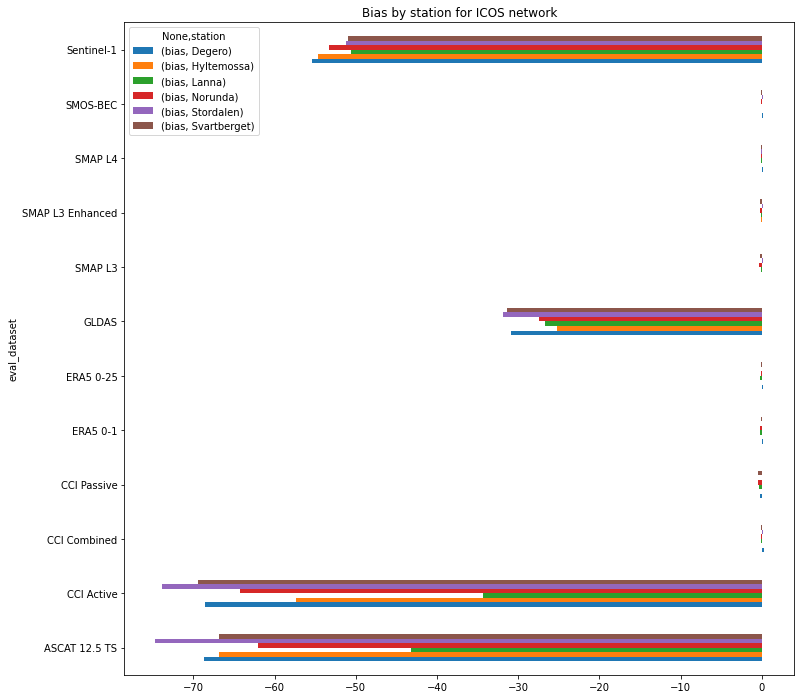

In [47]:
table.plot(kind="barh", figsize=(12,12), title="Bias by station for ICOS network")

In [48]:
table = pd.pivot_table(df,index=['eval_dataset'],columns=['station'],values=['ubrmsd'])
table

ubrmsd                                              \
station              Degero Hyltemossa      Lanna    Norunda  Stordalen   
eval_dataset                                                              
ASCAT 12.5 TS      8.557894  12.320507  23.728234  12.807934  16.005515   
CCI Active         9.349954  17.438993  20.550844  13.238355  14.312846   
CCI Combined       0.125129   0.070567   0.086051   0.053865   0.111845   
CCI Passive        0.140666   0.095688   0.120507   0.118628        NaN   
ERA5 0-1           0.135560   0.064268   0.106847   0.053528   0.105258   
ERA5 0-25          0.135814   0.063967   0.106679   0.052269   0.105214   
GLDAS              9.587256   3.408670   5.862748   7.876302   7.920941   
SMAP L3            0.135715   0.077834   0.127212   0.074910   0.089245   
SMAP L3 Enhanced   0.136274   0.088185   0.105031   0.073524   0.100842   
SMAP L4            0.131294   0.062601   0.111237   0.056505   0.114061   
SMOS-BEC           0.128279   0.106535   0.121595   0.093709   0.103043   
Sentinel-1        24.100771  22.937761  26.272762  23.925896  29.525505   

                              
station          Svartberget  
eval_dataset                  
ASCAT 12.5 TS       8.744755  
CCI Active          9.607155  
CCI Combined        0.043116  
CCI Passive         0.154355  
ERA5 0-1            0.046859  
ERA5 0-25           0.045965  
GLDAS               9.480887  
SMAP L3             0.069413  
SMAP L3 Enhanced    0.072970  
SMAP L4             0.044153  
SMOS-BEC            0.071622  
Sentinel-1         23.763853

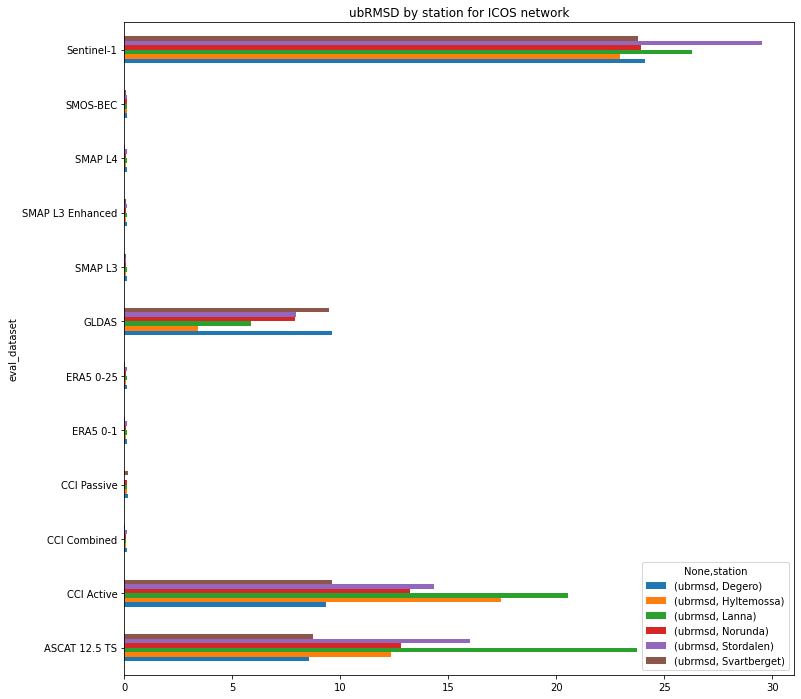

In [49]:
table.plot(kind="barh", figsize=(12,12), title="ubRMSD by station for ICOS network")

In [50]:
mf = r"..\..\..\thesis\metrics\hobe_metrics_wcover.csv"
mdf = pd.read_csv(mf)
print(mdf)

     network station     lon      lat   eval_dataset     timefilter   anomaly  \
0       HOBE    1.01  9.1809  56.0193  ASCAT 12.5 TS  No_Timefilter  absolute   
1       HOBE    1.01  9.1809  56.0193  ASCAT 12.5 TS          Y2015  absolute   
2       HOBE    1.01  9.1809  56.0193  ASCAT 12.5 TS          Y2016  absolute   
3       HOBE    1.01  9.1809  56.0193  ASCAT 12.5 TS          Y2017  absolute   
4       HOBE    1.01  9.1809  56.0193  ASCAT 12.5 TS          Y2018  absolute   
...      ...     ...     ...      ...            ...            ...       ...   
8995    HOBE    3.09  9.2945  55.8609       SMOS-BEC   Y2018-summer  absolute   
8996    HOBE    3.09  9.2945  55.8609       SMOS-BEC     Y2015-fall  absolute   
8997    HOBE    3.09  9.2945  55.8609       SMOS-BEC     Y2016-fall  absolute   
8998    HOBE    3.09  9.2945  55.8609       SMOS-BEC     Y2017-fall  absolute   
8999    HOBE    3.09  9.2945  55.8609       SMOS-BEC     Y2018-fall  absolute   

      pearson_r  pearson_r_

In [51]:
df = mdf[mdf['timefilter'] == 'No_Timefilter']
df = df[['station', 'cover', 'eval_dataset', 'pearson_r', 'bias', 'ubrmsd']]
print(df)

     station        cover   eval_dataset  pearson_r       bias     ubrmsd
0       1.01        Heath  ASCAT 12.5 TS   0.553809 -61.665414  16.803214
25      1.02  Agriculture  ASCAT 12.5 TS   0.747482 -61.778025  16.250879
50      1.03        Heath  ASCAT 12.5 TS   0.549627 -60.961201  17.053199
75      1.04       Forest  ASCAT 12.5 TS   0.339975 -57.694363  16.821670
100     1.05       Forest  ASCAT 12.5 TS   0.516067 -62.017190  16.821137
...      ...          ...            ...        ...        ...        ...
8875    3.05  Agriculture       SMOS-BEC   0.627660  -0.036218   0.066886
8900    3.06       Forest       SMOS-BEC   0.384704  -0.107307   0.070094
8925    3.07  Agriculture       SMOS-BEC   0.691916   0.026481   0.066932
8950    3.08  Agriculture       SMOS-BEC   0.482983   0.026013   0.064082
8975    3.09  Agriculture       SMOS-BEC   0.536167  -0.021877   0.061238

[360 rows x 6 columns]


In [52]:
table = pd.pivot_table(df,index=['eval_dataset'],columns=['cover'],values=['pearson_r'])
table

pearson_r                    
cover            Agriculture    Forest     Heath
eval_dataset                                    
ASCAT 12.5 TS       0.603328  0.399696  0.395665
CCI Active          0.607486  0.418978  0.484796
CCI Combined        0.632798  0.450930  0.535917
CCI Passive         0.576949  0.433897  0.401502
ERA5 0-1            0.643887  0.585504  0.564766
ERA5 0-25           0.643033  0.584221  0.563696
GLDAS               0.602343  0.568156  0.526269
SMAP L3             0.735569  0.567807  0.463965
SMAP L3 Enhanced    0.727176  0.558729  0.446782
SMAP L4             0.601592  0.706512  0.543148
SMOS-BEC            0.555434  0.423618  0.300647
Sentinel-1          0.381928  0.092863  0.252144

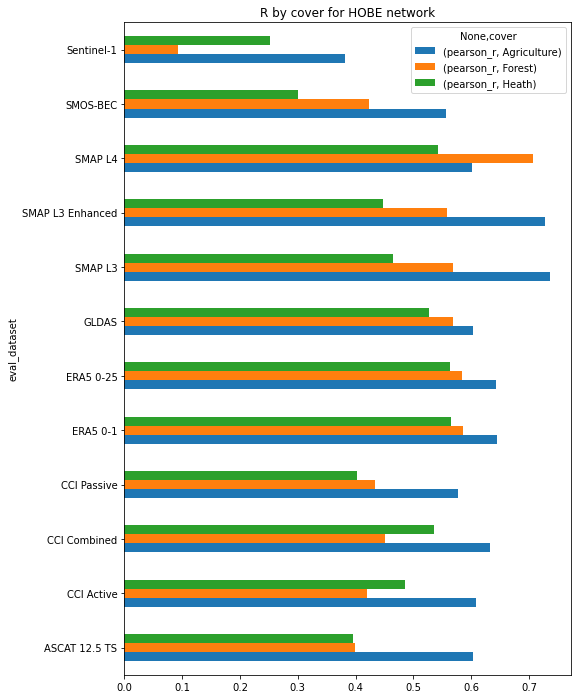

In [54]:
table.plot(kind="barh", figsize=(8,12), title="R by cover for HOBE network")